In [2]:
import pandas as pd 
import numpy as np 
import scipy.stats
from decimal import Decimal 
import matplotlib.pyplot as plt
import seaborn as sns 
import glob 
import json 
from sklearn import metrics

In [16]:
with open("490_genes_from_cell_screen.txt", "r") as f:
    genes_490 = list(map(lambda x : x.replace("\n", ""), f.readlines()))
f.close()

def simes(p_vals):
    sorted_p = p_vals.sort_values()
    ranks = pd.Series(range(1, len(p_vals) + 1))
    multiplied = sorted_p * len(ranks)
    results = multiplied/ranks.values
    return min(results)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


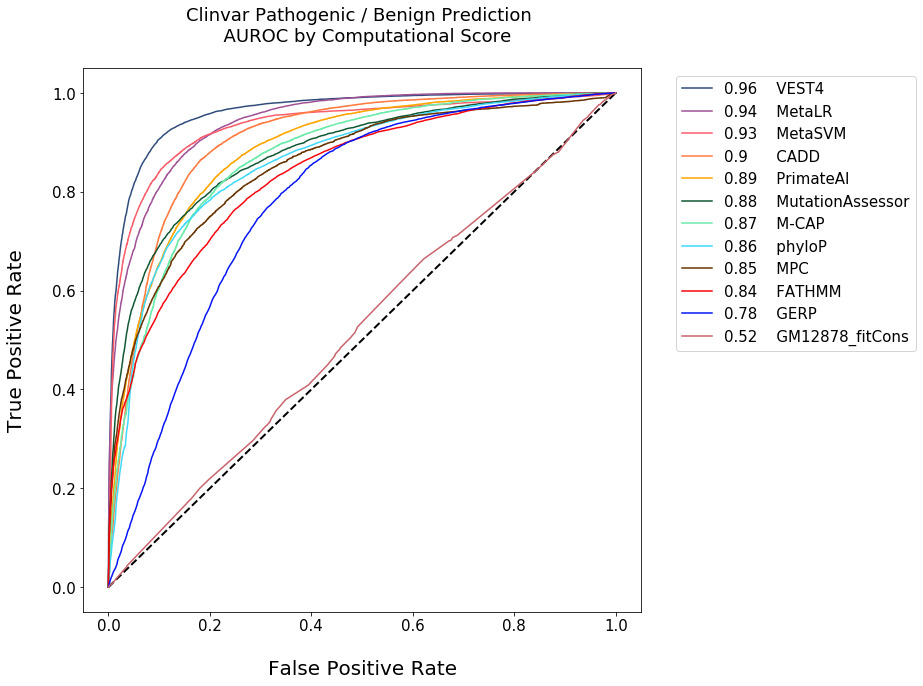

In [17]:
fig, ax = plt.subplots(figsize = (10,10))

colors = [
    "#2f4b7c",
    "#a05195",
    "#d45087",
    "#f95d6a",
    "#ff7c43",
    "#ffa600",
    "#0f5733",
    "#6cebab",
    "#3dd9fc",
    "#693502",
    "#f7050d",
    "#0515f7",
    "#c9636b"
]

auc_files = glob.glob("./auroc_data/*json")

score_dict = {}
for f in auc_files:
    data = json.load(open(f))
    auc = data["auc"]
    label = f.replace("./auroc_data/", "").replace("_score", "").replace(".json", "")
    if label == "FATHMM":
        auc = 1 - auc 
    score_dict[f] = auc

score_dict = {k: v for k, v in sorted(score_dict.items(), key=lambda item: item[1], reverse = True)}
ax.plot([0, 1], [0, 1], color = 'black', linewidth = 2, linestyle = "--")
for color, (f, v) in zip(colors, score_dict.items()):
    data = json.load(open(f))
    y_pred = data["y_pred"]
    y_true = data["y_true"]
    auc = data["auc"]
    fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred)
    label = f.replace("./auroc_data/", "").replace("_score", "").replace(".json", "")
    if label == "Delet":
        label = "Deleteriousness Predictor"
        continue
    ## fathmm predicts in the opposite direction , 0 is the worst, 1 is the least bad 
    if label == "FATHMM":
        tpr = list(map(lambda x : 1 - x, tpr))
        fpr = list(map(lambda x : 1 - x, fpr))
        auc = 1 - auc 
    auc = str(round(auc, 2))
    if len(auc) == 3:
        label = auc + "      " + label
    else:
        label = auc + "    " + label
    ax.plot(fpr, tpr, label = label, color = color)

# ax.legend(loc = "lower right")
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize = 15)
ax.set_xlabel("\nFalse Positive Rate", fontsize = 20)
ax.set_ylabel("True Positive Rate\n",fontsize = 20)
ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0], fontsize = 15)

ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0])
ax.set_yticklabels([0.0,0.2,0.4,0.6,0.8,1.0], fontsize = 15)
ax.set_title("Clinvar Pathogenic / Benign Prediction \n  AUROC by Computational Score\n", fontsize = 18)
fig.savefig("AUROC_clinvar.eps", fmy ="eps", bbox_inches = "tight")

0.0046 0.0001


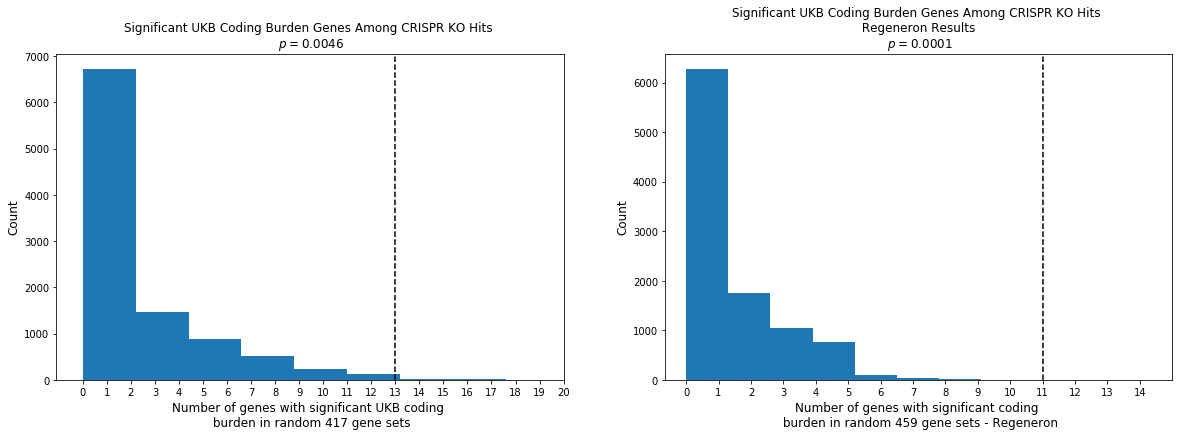

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))


with open("./data/random_gene_selection_data/060222_10k_random_samples_delet.txt", "r") as f:
    lines = f.readlines()
    delet_gene_vals = list(map(lambda x : int(x.replace("\n", "")), lines))
f.close()

with open("./data/random_gene_selection_data/060222_10k_regeneron_random_samples_delet_regeneron.txt", "r") as f:
    lines = f.readlines()
    regeneron_gene_vals = list(map(lambda x : int(x.replace("\n", "")), lines))
f.close()

p_delet = len(list(filter(lambda x : x > 13, delet_gene_vals))) / len(delet_gene_vals)
p_regeneron = len(list(filter(lambda x : x > 11, regeneron_gene_vals))) / len(regeneron_gene_vals)

print(p_delet, p_regeneron)

ax1.hist(delet_gene_vals)
ax1.set_title("Significant UKB Coding Burden Genes Among CRISPR KO Hits \n $p = " + str(p_delet) + "$")
ax1.axvline(x=13, linestyle = "--", color = "black")
ax1.set_ylabel("Count", fontsize = 12)
ax1.set_xlabel("Number of genes with significant UKB coding \n burden in random 417 gene sets" , fontsize = 12)
ax1.set_xticks(list(range(21)))
ax1.set_xlim(right = 20)


ax2.hist(regeneron_gene_vals)
ax2.axvline(x=11, linestyle = "--", color = "black")
ax2.set_title("Significant UKB Coding Burden Genes Among CRISPR KO Hits \n Regeneron Results \n $p = " + str(p_regeneron) + "$")
ax2.set_ylabel("Count", fontsize =12)
ax2.set_xlabel("Number of genes with significant coding \n burden in random 459 gene sets - Regeneron" , fontsize = 12)

ax2.set_xticks(list(range(15)))
ax2.set_xlim(right = 15)



# fig.savefig("10k_random_selections_two_conditions.eps", bbox_inches = "tight", fmt ="eps")



0.3463
0.0002


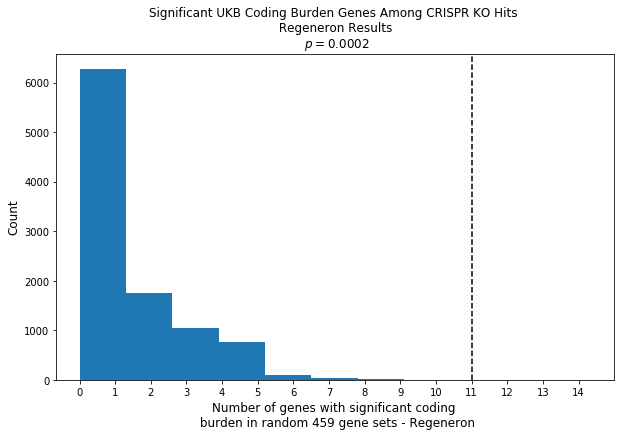

In [14]:
fig, (ax) = plt.subplots(figsize = (10, 6))

with open("./data/random_gene_selection_data/060222_10k_regeneron_random_samples_delet_regeneron.txt", "r") as f:
    lines = f.readlines()
    regeneron_gene_vals = list(map(lambda x : int(x.replace("\n", "")), lines))
f.close()
# 
# p_delet = len(list(filter(lambda x : x > 13, delet_gene_vals))) / len(delet_gene_vals)
p_regeneron = len(list(filter(lambda x : x > 10, regeneron_gene_vals))) / len(regeneron_gene_vals)
zero_regeneron = len(list(filter(lambda x : x ==0, regeneron_gene_vals))) / len(regeneron_gene_vals)

print(zero_regeneron)
print(p_regeneron)

ax.hist(regeneron_gene_vals)
ax.axvline(x=11, linestyle = "--", color = "black")
ax.set_title("Significant UKB Coding Burden Genes Among CRISPR KO Hits \n Regeneron Results \n $p = " + str(p_regeneron) + "$")
ax.set_ylabel("Count", fontsize =12)
ax.set_xlabel("Number of genes with significant coding \n burden in random 459 gene sets - Regeneron" , fontsize = 12)
ax.set_xticks(list(range(15)))
ax.set_xlim(right = 15)

fig.savefig("Regeneron_10k_permutations.eps", fmt = "eps", bbox_inches = "tight")


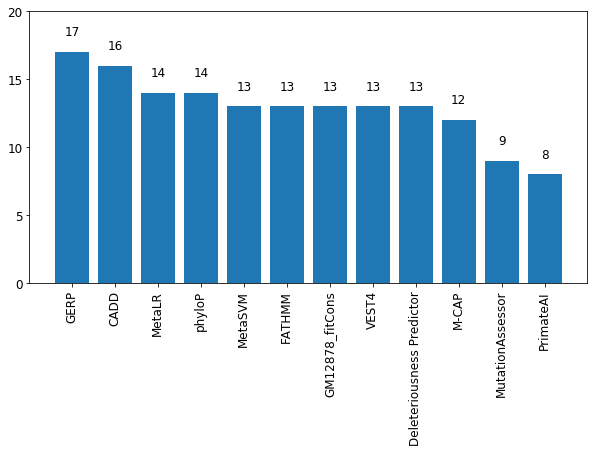

In [122]:
scores = [
    "MetaSVM_score", 
    "M-CAP_score", 
    "FATHMM_score", 
    "CADD", 
    "GM12878_fitCons_score", 
    "PrimateAI_score", 
    "MutationAssessor_score",
    "MetaLR_score",
    "GERP",
    "phyloP",
    "VEST4_score"
]

results_dict = {}

score_comparison_data = []

for s in scores:
    mega_df = pd.concat(
        [
            pd.read_csv('./alternate_score_files/042722_whole_genome_0th_perc_442_genes.csv'),
            pd.read_csv(f'./alternate_score_files/042722_whole_genome_25th_perc_{s}_442_genes.csv'),
            pd.read_csv(f'./alternate_score_files/042722_whole_genome_50th_perc_{s}_442_genes.csv'),
            pd.read_csv(f'./alternate_score_files/042722_whole_genome_75th_perc_{s}_442_genes.csv'),
        ]
    )

    df = mega_df
    df["mwu_a_pval"] = df[['mwu_a_pval_greater','mwu_a_pval_less']].min(axis=1)
    col_of_interest = "mwu_a_pval"
    subset = df.loc[
        (df["gene"].isin(genes_490)) &
        (~df[col_of_interest].isna()) &
        (df['high_impact_carriers'] >= 10)
    ].sort_values(by = col_of_interest)
    alt_values = []
    for g in set(subset["gene"].values):
        ss = subset.loc[subset["gene"] == g]
        p_vals = pd.Series(ss[col_of_interest].values)
        simes_p = simes(p_vals)
        alt_values.append([g, simes_p])

    simes_df = pd.DataFrame(alt_values, columns = ["gene", "simes_p"])
    m = len(simes_df)
    signif = set()
    alpha = 0.1
    simes_df = simes_df.sort_values(by = "simes_p")
    for counter, (index, row) in enumerate(simes_df.iterrows()):
        if row["simes_p"] <= ((counter+1) / m) * alpha:
            signif.add(row["gene"])
    results_dict[s.replace("_score", "")] = len(signif)
    score_comparison_data.append(
        [s.replace("_score", ""),  len(signif), "|".join(sorted(list(signif)))]
    )
    
score_comparison_data.append([
    "Deleteriousness Predictor", 13, "ABCA1|ABCG5|APOE|BRD2|EXOC4|LDLR|MYLIP|OTX2|RABIF|SETD1A|SLC35A2|SPAG5|ZNF287"
])
results_dict["Deleteriousness Predictor"] = 13 
results_dict = {k: v for k, v in sorted(results_dict.items(), key=lambda item: item[1], reverse = True)}


x_labels = list(results_dict.keys())
y = list(results_dict.values())
x = np.arange(len(y))
fig, ax = plt.subplots(figsize = (10,5))
rects = ax.patches
ax.bar(x, y)
for rect, label in zip(rects, y):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 1, str(label), ha="center", va="bottom", fontsize = 12
    )
    
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation = 90, fontsize = 12)
ax.set_yticks(list(np.arange(0, 21, 5)))
ax.set_yticklabels(list(map(lambda x : int(x), np.arange(0, 21, 5))), fontsize = 12)

df = pd.DataFrame(score_comparison_data, columns = ["Score", "n_signif", "signif_genes"])
df.to_csv("score_comparison_significant_genes.csv")

fig.savefig("signif_genes_bar_chart.eps", bbox_inches = "tight", fmt ="eps")


In [139]:
for s in scores:
    for perc in [25,50,75]:
        df = pd.read_csv(f'./alternate_score_files/042722_whole_genome_{perc}th_perc_{s}_442_genes.csv')
        df["mwu_a_pval"] = df[['mwu_a_pval_greater', 'mwu_a_pval_less']].min(axis=1)
        df["mwu_two_sided"] = df["mwu_a_pval"].apply(lambda x : x*2)
        df["adj_ldl_diff"] = df["a_mean"] - df["ldl_non_carrier"]
        print(len(df))
        
        df = df.loc[
            ~(df["mwu_a_pval"].isna()) &
            (df["high_impact_carriers"] >= 10)
        ]
        
        m = len(df)
        print(f"442_genes_{s}_{perc}th_percentile", m)
        alpha = 0.1
        is_signif = []
        signif = set()
        
        
        for counter, (index, row) in enumerate(df.iterrows()):
            p = row[col_of_interest]
            if (p / 2) <= ((counter + 1) / m) * alpha:
                is_signif.append(True)
                signif.add(row["gene"])
            else:
                is_signif.append(False)

        df["signif_FDR_0.1"] = is_signif

        df = df.rename(
            columns = {
                "b_vals_non_carrier_mean": "adjusted_ldl_non_carrier",
                "b_vals_carrier_mean" : "adjusted_ldl_high_impact_carrier",
            }
        )

        df["mwu p"] =  df["mwu_a_pval"].apply(lambda x : x *2)
        keeping = ["gene", "percentile", "high_impact_carriers", "percentile", "adj_ldl_diff",  "mwu p", "signif_FDR_0.1"]
        df = df[keeping]
        df.to_csv(f"./alternate_score_files_cleaned/{s}_{perc}th_percentile_490_limited.csv", index = False)
    

442
442_genes_MetaSVM_score_25th_percentile 413
442
442_genes_MetaSVM_score_50th_percentile 402
442
442_genes_MetaSVM_score_75th_percentile 368
442
442_genes_M-CAP_score_25th_percentile 411
442
442_genes_M-CAP_score_50th_percentile 402
442
442_genes_M-CAP_score_75th_percentile 365
442
442_genes_FATHMM_score_25th_percentile 391
442
442_genes_FATHMM_score_50th_percentile 333
442
442_genes_FATHMM_score_75th_percentile 275
442
442_genes_CADD_25th_percentile 413
442
442_genes_CADD_50th_percentile 409
442
442_genes_CADD_75th_percentile 389
442
442_genes_GM12878_fitCons_score_25th_percentile 384
442
442_genes_GM12878_fitCons_score_50th_percentile 375
442
442_genes_GM12878_fitCons_score_75th_percentile 331
442
442_genes_PrimateAI_score_25th_percentile 411
442
442_genes_PrimateAI_score_50th_percentile 404
442
442_genes_PrimateAI_score_75th_percentile 386
442
442_genes_MutationAssessor_score_25th_percentile 402
442
442_genes_MutationAssessor_score_50th_percentile 390
442
442_genes_MutationAssess

0.3247
0.0097


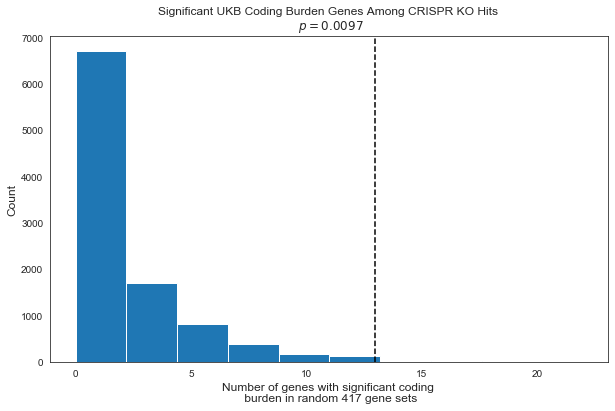

In [36]:
with open("VEST4_060222_10k_random_samples_delet.txt", "r") as f:
    s_lines = f.readlines()
    s_lines = list(map(lambda x : int(x.replace("\n", "")), s_lines))
f.close()

print(len(list(filter(lambda x : x == 0, s_lines))) / len(s_lines))
print(len(list(filter(lambda x : x > 12, s_lines))) / len(s_lines))

sns.set_style("white")
p_val = len(list(filter(lambda x : x > 12, s_lines))) / len(s_lines)
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(s_lines,bins =10)
ax.set_ylabel("Count", fontsize = 12)
ax.set_xlabel("Number of genes with significant coding \n burden in random 417 gene sets" , fontsize = 12)
ax.set_title("Significant UKB Coding Burden Genes Among CRISPR KO Hits \n $p = " + str(p_val) + "$")
ax.axvline(x=13, linestyle = "--", color = "black")
fig.savefig("VEST4_10k_permutations.png")
fig.savefig("VEST4_10k_permutations.eps", fmt = "eps", bbox_inches = "tight")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_Apolipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_Apolipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_Apolipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_Apolipo-A_vals_appended.csv']
0 0.035
1 0.24776595744680852
2 0.460531914893617
3 0.6732978723404255
4 0.8860638297872341


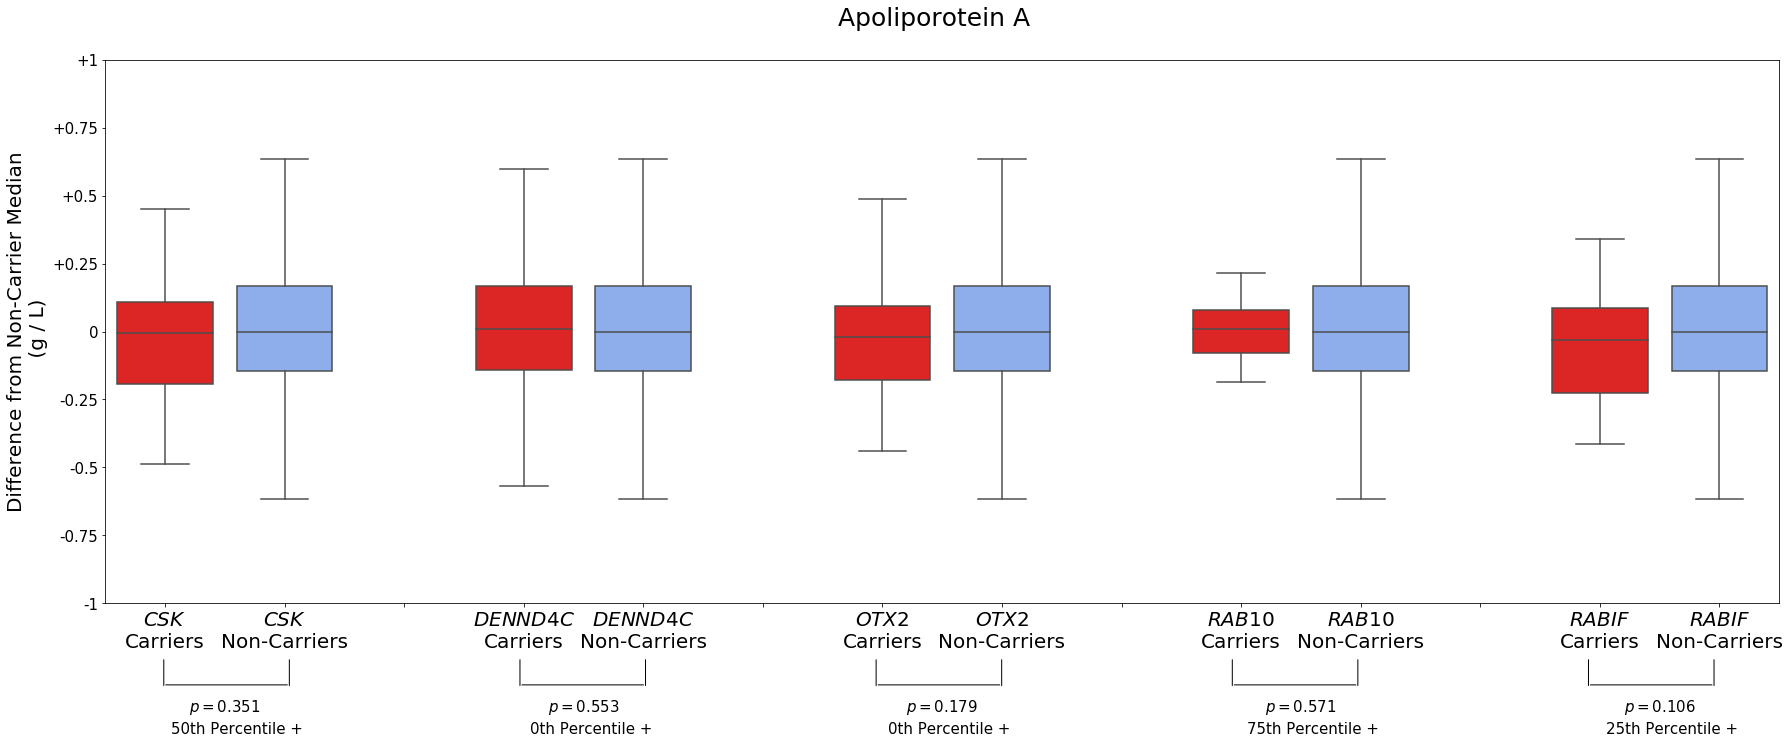

In [17]:
y = []
x_ticks = []
x_tick_labels = []
df_list = []
phenotype = "Apolipo-A"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    
fig,ax = plt.subplots(figsize= (30,10))

mega_df = pd.concat(df_list)
counter = 0
my_pal = {}
# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)
gene_counter = 0
for gene in sorted(set(mega_df["gene"])):
    gene_subset = mega_df.loc[mega_df["gene"] == gene].sort_values(by = "mwu_b_pval")
    min_value = gene_subset.iloc[0]
    pct_50 = gene_subset.loc[gene_subset["percentile"] == 50].iloc[0]
    p = min_value["mwu_b_pval"] * 2
    perc = min_value["percentile"]
    carriers = list(map(lambda x : float(x), pct_50["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : float(x), pct_50["b_non_carrier_values"].split("|")))
    nc_median = np.median(non_carriers)
    carriers = list(map(lambda x : x - nc_median, carriers))
    non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    my_pal[counter] = "#fa0707"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nCarriers")
    counter += 1
    my_pal[counter] = "#7daafa"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nNon-Carriers")
    counter += 1 
    my_pal[counter] = "white"
    x_ticks.append(counter)
    x_tick_labels.append("")
    counter += 1
    point1 = 0.035 + (gene_counter  / 4.7) 
    point2 = -0.15
    point3 = 0.11 + (gene_counter / 4.7)
    point4 = -0.1
    print(gene_counter, point1)
    ax.annotate('',  xy=(point1, point2), xycoords='axes fraction', xytext=(point3, point2), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point1, point2 - 0.005), xycoords='axes fraction', xytext=(point1, point4), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point3, point2 - 0.005), xycoords='axes fraction', xytext=(point3, point4), arrowprops=dict(arrowstyle="-", color='black'))
    p_val = str(round(p, ))
    ax.text(counter - 3 + 0.2, -1.4, "$p = " + str(round(p, 3)) + "$", fontsize = 15)
    ax.text(counter - 3 + 0.05, -1.48, str(perc) + "th Percentile +", fontsize = 15)
    
    gene_counter += 1
    
y = y[:-1]


sns.boxplot(
    data = y, 
    ax = ax, 
    showfliers = False,
    palette = my_pal
)

ax.set_xticklabels(x_tick_labels, fontsize = 20)
ax.set_yticks(list(np.arange(-1,1.01, 0.25)))
ax.set_yticklabels(["-1", "-0.75", "-0.5", "-0.25", "0", "+0.25", "+0.5", "+0.75", "+1"], fontsize = 15)
ax.set_ylabel("Difference from Non-Carrier Median\n (g / L)", fontsize = 20)
ax.set_title("Apoliporotein A  \n ", fontsize = 25)
fig.savefig("Apolipo_A_5_gene_diff_VEST4.eps", format = "eps", bbox_inches = "tight")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_HDL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_HDL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_HDL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_HDL_vals_appended.csv']
0 0.035
1 0.24776595744680852
2 0.460531914893617
3 0.6732978723404255
4 0.8860638297872341


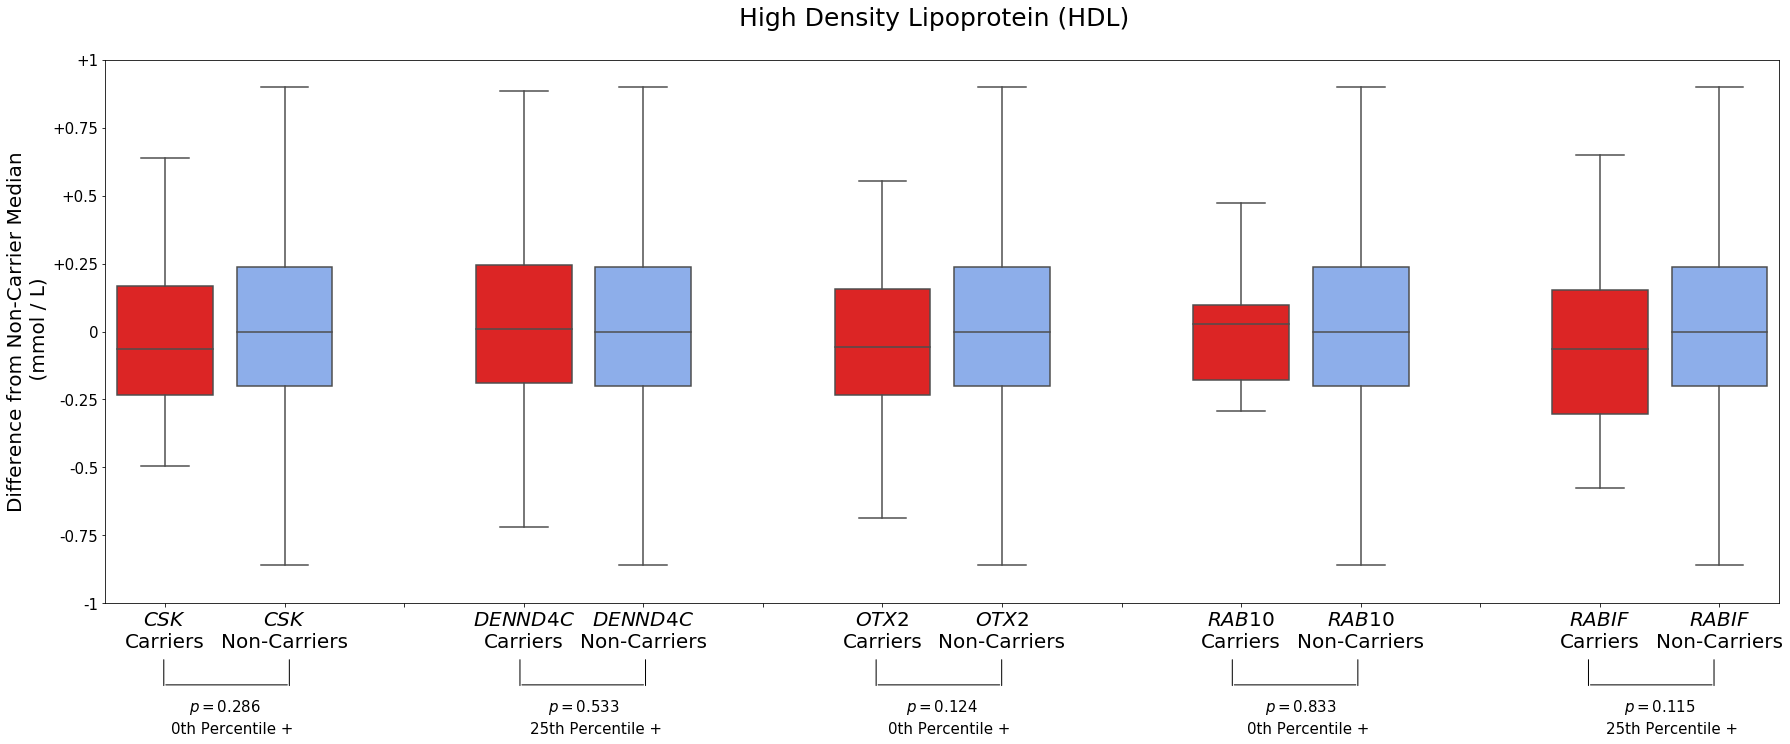

In [24]:
y = []
x_ticks = []
x_tick_labels = []
df_list = []
phenotype = "HDL"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    
fig,ax = plt.subplots(figsize= (30,10))

mega_df = pd.concat(df_list)
counter = 0
my_pal = {}
# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)
gene_counter = 0
for gene in sorted(set(mega_df["gene"])):
    gene_subset = mega_df.loc[mega_df["gene"] == gene].sort_values(by = "mwu_b_pval")
    min_value = gene_subset.iloc[0]
    p = min_value["mwu_b_pval"] * 2
    perc = min_value["percentile"]
    pct_50 = gene_subset.loc[gene_subset["percentile"] == 50].iloc[0]
    carriers = list(map(lambda x : float(x), pct_50["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : float(x), pct_50["b_non_carrier_values"].split("|")))
    nc_median = np.median(non_carriers)
    carriers = list(map(lambda x : x - nc_median, carriers))
    non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    my_pal[counter] = "#fa0707"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nCarriers")
    counter += 1
    my_pal[counter] = "#7daafa"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nNon-Carriers")
    counter += 1 
    my_pal[counter] = "white"
    x_ticks.append(counter)
    x_tick_labels.append("")
    counter += 1
    point1 = 0.035 + (gene_counter  / 4.7) 
    point2 = -0.15
    point3 = 0.11 + (gene_counter / 4.7)
    point4 = -0.1
    print(gene_counter, point1)
    ax.annotate('',  xy=(point1, point2), xycoords='axes fraction', xytext=(point3, point2), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point1, point2 - 0.005), xycoords='axes fraction', xytext=(point1, point4), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point3, point2 - 0.005), xycoords='axes fraction', xytext=(point3, point4), arrowprops=dict(arrowstyle="-", color='black'))
    p_val = str(round(p, ))
    ax.text(counter - 3 + 0.2, -1.4, "$p = " + str(round(p, 3)) + "$", fontsize = 15)
    ax.text(counter - 3 + 0.05, -1.48, str(perc) + "th Percentile +", fontsize = 15)
    
    gene_counter += 1
    
y = y[:-1]


sns.boxplot(
    data = y, 
    ax = ax, 
    showfliers = False,
    palette = my_pal
)

ax.set_xticklabels(x_tick_labels, fontsize = 20)
ax.set_yticks(list(np.arange(-1,1.01, 0.25)))
ax.set_yticklabels(["-1", "-0.75", "-0.5", "-0.25", "0", "+0.25", "+0.5", "+0.75", "+1"], fontsize = 15)
ax.set_ylabel("Difference from Non-Carrier Median\n (mmol / L)", fontsize = 20)
ax.set_title("High Density Lipoprotein (HDL)  \n ", fontsize = 25)
fig.savefig("HDL_5_gene_diff_VEST4.eps", format = "eps", bbox_inches = "tight")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_TRIGL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_TRIGL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_TRIGL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_TRIGL_vals_appended.csv']
0 0.035
1 0.24776595744680852
2 0.460531914893617
3 0.6732978723404255
4 0.8860638297872341


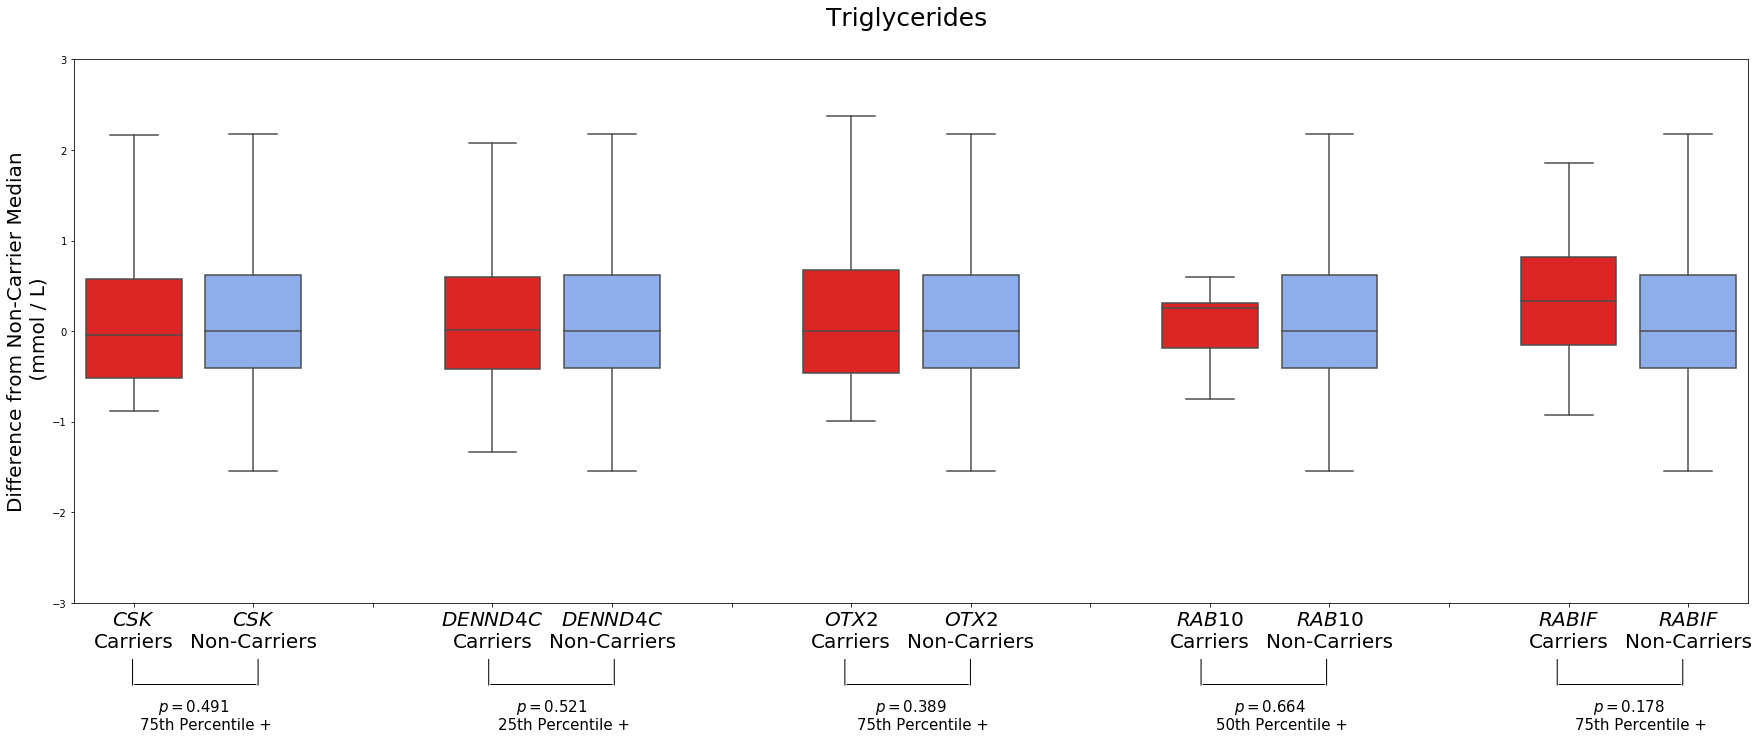

In [23]:
y = []
x_ticks = []
x_tick_labels = []
df_list = []
phenotype = "TRIGL"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    
fig,ax = plt.subplots(figsize= (30,10))

mega_df = pd.concat(df_list)
counter = 0
my_pal = {}
# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)
gene_counter = 0
for gene in sorted(set(mega_df["gene"])):
    gene_subset = mega_df.loc[mega_df["gene"] == gene].sort_values(by = "mwu_b_pval")
    min_value = gene_subset.iloc[0]
    pct_50 = gene_subset.loc[gene_subset["percentile"] == 50].iloc[0]
    carriers = list(map(lambda x : float(x), pct_50["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : float(x), pct_50["b_non_carrier_values"].split("|")))
    p = min_value["mwu_b_pval"] * 2
    perc = min_value["percentile"]
    nc_median = np.median(non_carriers)
    carriers = list(map(lambda x : x - nc_median, carriers))
    non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    my_pal[counter] = "#fa0707"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nCarriers")
    counter += 1
    my_pal[counter] = "#7daafa"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nNon-Carriers")
    counter += 1 
    my_pal[counter] = "white"
    x_ticks.append(counter)
    x_tick_labels.append("")
    counter += 1
    point1 = 0.035 + (gene_counter  / 4.7) 
    point2 = -0.15
    point3 = 0.11 + (gene_counter / 4.7)
    point4 = -0.1
    print(gene_counter, point1)
    ax.annotate('',  xy=(point1, point2), xycoords='axes fraction', xytext=(point3, point2), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point1, point2 - 0.005), xycoords='axes fraction', xytext=(point1, point4), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point3, point2 - 0.005), xycoords='axes fraction', xytext=(point3, point4), arrowprops=dict(arrowstyle="-", color='black'))
    p_val = str(round(p, ))
    ax.text(counter - 3 + 0.2, -4.2, "$p = " + str(round(p, 3)) + "$", fontsize = 15)
    ax.text(counter - 3 + 0.05, -4.4, str(perc) + "th Percentile +", fontsize = 15)
    gene_counter += 1
    
y = y[:-1]


sns.boxplot(
    data = y, 
    ax = ax, 
    showfliers = False,
    palette = my_pal
)

ax.set_xticklabels(x_tick_labels, fontsize = 20)
ax.set_yticks(list(np.arange(-3,3.01, 1)))
# ax.set_yticklabels(["-1", "-0.75", "-0.5", "-0.25", "0", "+0.25", "+0.5", "+0.75", "+1"], fontsize = 15)
ax.set_ylabel("Difference from Non-Carrier Median\n (mmol / L)", fontsize = 20)
ax.set_title("Triglycerides \n ", fontsize = 25)

fig.savefig("TRIGL_5_gene_diff_VEST4.eps", format = "eps", bbox_inches = "tight")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_Lipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_Lipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_Lipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_Lipo-A_vals_appended.csv']
0 0.035
1 0.24776595744680852
2 0.460531914893617
3 0.6732978723404255
4 0.8860638297872341


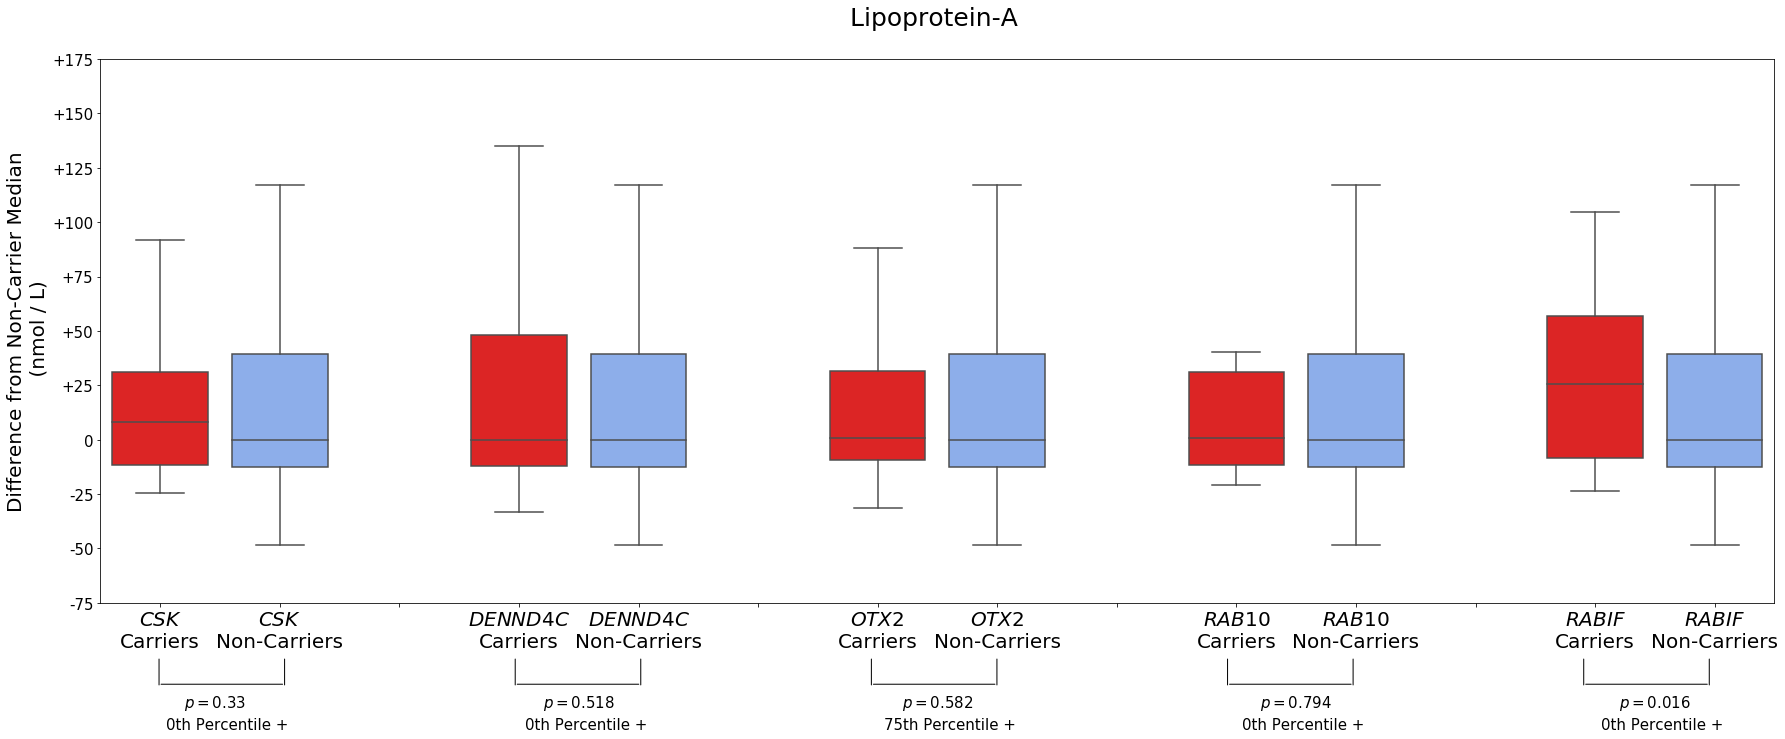

In [22]:
y = []
x_ticks = []
x_tick_labels = []
df_list = []
phenotype = "Lipo-A"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    
fig,ax = plt.subplots(figsize= (30,10))

mega_df = pd.concat(df_list)
counter = 0
my_pal = {}
# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)
gene_counter = 0
for gene in sorted(set(mega_df["gene"])):
    gene_subset = mega_df.loc[mega_df["gene"] == gene].sort_values(by = "mwu_b_pval")
    min_value = gene_subset.iloc[0]
    pct_50 = gene_subset.loc[gene_subset["percentile"] == 50].iloc[0]
    carriers = list(map(lambda x : float(x), pct_50["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : float(x), pct_50["b_non_carrier_values"].split("|")))
    p = min_value["mwu_b_pval"] * 2
    perc = min_value["percentile"]
    nc_median = np.median(non_carriers)
    carriers = list(map(lambda x : x - nc_median, carriers))
    non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    my_pal[counter] = "#fa0707"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nCarriers")
    counter += 1
    my_pal[counter] = "#7daafa"
    x_ticks.append(counter)
    x_tick_labels.append("$\it{" + gene + "}$\nNon-Carriers")
    counter += 1 
    my_pal[counter] = "white"
    x_ticks.append(counter)
    x_tick_labels.append("")
    counter += 1
    point1 = 0.035 + (gene_counter  / 4.7) 
    point2 = -0.15
    point3 = 0.11 + (gene_counter / 4.7)
    point4 = -0.1
    print(gene_counter, point1)
    ax.annotate('',  xy=(point1, point2), xycoords='axes fraction', xytext=(point3, point2), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point1, point2 - 0.005), xycoords='axes fraction', xytext=(point1, point4), arrowprops=dict(arrowstyle="-", color='black'))
    ax.annotate('',  xy=(point3, point2 - 0.005), xycoords='axes fraction', xytext=(point3, point4), arrowprops=dict(arrowstyle="-", color='black'))
    ax.text(counter - 3 + 0.2, -123, "$p = " + str(round(p, 3)) + "$", fontsize = 15)
    ax.text(counter - 3 + 0.05, -133, str(perc) + "th Percentile +", fontsize = 15)
    gene_counter += 1
    
y = y[:-1]

sns.boxplot(
    data = y, 
    ax = ax, 
    showfliers = False,
    palette = my_pal
)

ax.set_xticklabels(x_tick_labels, fontsize = 20)
ax.set_yticks(list(np.arange(-75,175.1, 25)))
ax.set_yticklabels(["-75", "-50", "-25", "0", "+25", "+50", "+75", "+100", "+125", "+150", "+175"], fontsize = 15)
ax.set_ylabel("Difference from Non-Carrier Median\n (nmol / L)", fontsize = 20)
ax.set_title("Lipoprotein-A \n ", fontsize = 25)
fig.savefig("Lipo_A_5_gene_diff_VEST4.eps", format = "eps", bbox_inches = "tight")

In [31]:
def round_sig(x, sig=2):
    return round(x, sig-int(np.floor(np.log10(abs(x))))-1)



0.00026

0.023 0.0073


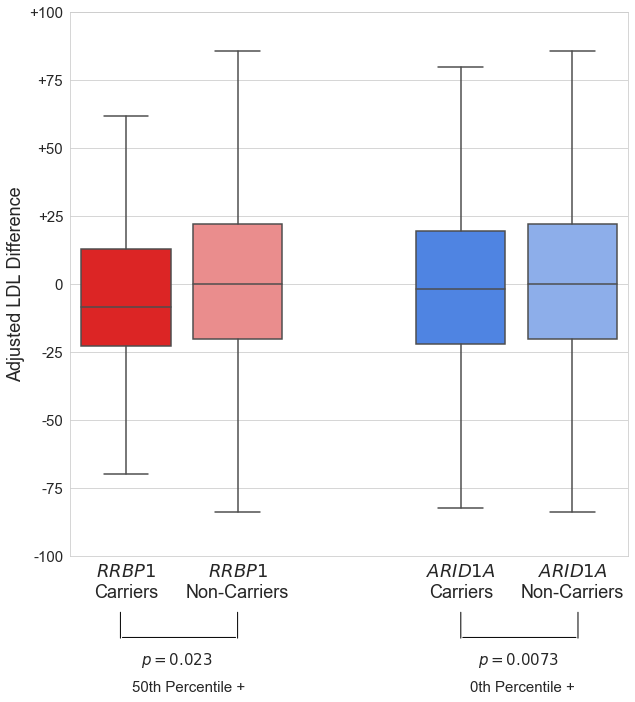

In [34]:
df = pd.read_csv("RRBP1_ARID1A_individual_points_VEST4.csv")
y = []
df.columns 
df["mwu_a_pval"] = df[['mwu_a_pval_greater', 'mwu_a_pval_less']].min(axis=1)
df["mwu_a_pval"] = df["mwu_a_pval"].apply(lambda x : x * 2)


RRBP1 = df.loc[df["gene"] == "RRBP1"] 
min_val = RRBP1.loc[RRBP1["mwu_a_pval"] == np.min(RRBP1["mwu_a_pval"])].iloc[0]
pct = min_val["percentile"]
RRBP1_p = round_sig(min_val["mwu_a_pval"])
carriers = list(map(lambda x : float(x), min_val["a_vals_carriers"].split("|")))
non_carriers = list(map(lambda x : float(x), min_val["a_vals_non_carriers"].split("|")))
nc_median = np.median(non_carriers)
carriers = list(map(lambda x : x - nc_median, carriers))
non_carriers = list(map(lambda x : x - nc_median, non_carriers))
y.append(carriers)
y.append(non_carriers)
y.append([])

ARID1A = df.loc[df["gene"] == "ARID1A"] 
min_val = ARID1A.loc[ARID1A["mwu_a_pval"] == np.min(ARID1A["mwu_a_pval"])].iloc[0]
pct = min_val["percentile"]
ARID1A_p = round_sig(min_val["mwu_a_pval"])
carriers = list(map(lambda x : float(x), min_val["a_vals_carriers"].split("|")))
non_carriers = list(map(lambda x : float(x), min_val["a_vals_non_carriers"].split("|")))
nc_median = np.median(non_carriers)
carriers = list(map(lambda x : x - nc_median, carriers))
non_carriers = list(map(lambda x : x - nc_median, non_carriers))
y.append(carriers)
y.append(non_carriers)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (10,10))
my_pal = {0: "#fa0707", 1 : "#fa7d7d", 2 :"white", 3: "#377dfa", 4 :"#7daafa"}
sns.boxplot(data = y, ax = ax, showfliers = False, palette = my_pal)
ax.set_xticklabels(
    [
        "$\it{RRBP1}$\nCarriers", 
        "$\it{RRBP1}$\nNon-Carriers",
        "",
        "$\it{ARID1A}$\nCarriers", 
        "$\it{ARID1A}$\nNon-Carriers"
    ],
    fontsize = 18
)

print(RRBP1_p, ARID1A_p)
ax.set_ylabel("Adjusted LDL Difference", fontsize = 18)
ax.set_yticks([-100,-75,-50,-25,0,25,50,75,100])
ax.set_yticklabels(["-100","-75","-50","-25","0","+25","+50","+75","+100"], fontsize = 15)
# ax.axvline(x=2, ymin=-0.5, ymax=-0.2)
ax.annotate('',  xy=(0.09, -0.15), xycoords='axes fraction', xytext=(0.3, -0.15), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('',  xy=(0.09, -0.155), xycoords='axes fraction', xytext=(0.09, -0.1), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('',  xy=(0.3, -0.155), xycoords='axes fraction', xytext=(0.3, -0.1), arrowprops=dict(arrowstyle="-", color='black'))

ax.annotate('',  xy=(0.7, -0.15), xycoords='axes fraction', xytext=(0.91, -0.15), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('',  xy=(0.7, -0.155), xycoords='axes fraction', xytext=(0.7, -0.1), arrowprops=dict(arrowstyle="-", color='black'))
ax.annotate('',  xy=(0.91, -0.155), xycoords='axes fraction', xytext=(0.91, -0.1), arrowprops=dict(arrowstyle="-", color='black'))

ax.text(0.13, -140, "$p = " + str(RRBP1_p) + "$", fontsize = 15)
ax.text(0.05, -150, "50th Percentile +", fontsize = 15)

ax.text(3.15, -140, "$p = " + str(ARID1A_p) + "$", fontsize = 15)
ax.text(3.08, -150, "0th Percentile +", fontsize = 15)
fig.savefig("ARID1a_RRBP1_adj_LDL.eps", fmt = "eps", bbox_inches = "tight")

In [25]:
y = []

df_list = []
phenotype = "Apolipo-A"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    

mega_df = pd.concat(df_list)

# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)

dict_vals = []

for index, row in mega_df.iterrows():
    carriers = list(map(lambda x : round(float(x), 4), row["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : round(float(x), 4), row["b_non_carrier_values"].split("|"))) 
    nc_median = np.median(non_carriers)
#     carriers = list(map(lambda x : x - nc_median, carriers))
#     non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    p = row["mwu_b_pval"] * 2 
    a = {
        "gene" : row["gene"],
        "mwu_p" : p,
        "carrier_phenotype_vals" : "|".join(list(map(lambda x : str(round(x, 3)), carriers))),
        "non_carrier_phenotype_vals" : "|".join(list(map(lambda x : str(x), non_carriers))),
        "percentile" : row["percentile"],
        "mean_carrier_phenotype" : np.mean(carriers),
        "mean_non_carrier_phenotype" : np.mean(non_carriers),
    }
    dict_vals.append(a)
    
out_df = pd.DataFrame(dict_vals)
out_df.to_csv("VEST4_five_gene_phenotype_file_" + phenotype + ".csv")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_Apolipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_Apolipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_Apolipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_Apolipo-A_vals_appended.csv']


In [26]:
y = []

df_list = []
phenotype = "Lipo-A"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    

mega_df = pd.concat(df_list)

# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)

dict_vals = []

for index, row in mega_df.iterrows():
    carriers = list(map(lambda x : round(float(x), 4), row["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : round(float(x), 4), row["b_non_carrier_values"].split("|"))) 
    nc_median = np.median(non_carriers)
#     carriers = list(map(lambda x : x - nc_median, carriers))
#     non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    p = row["mwu_b_pval"] * 2 
    a = {
        "gene" : row["gene"],
        "mwu_p" : p,
        "carrier_phenotype_vals" : "|".join(list(map(lambda x : str(round(x, 3)), carriers))),
        "non_carrier_phenotype_vals" : "|".join(list(map(lambda x : str(x), non_carriers))),
        "percentile" : row["percentile"],
        "mean_carrier_phenotype" : np.mean(carriers),
        "mean_non_carrier_phenotype" : np.mean(non_carriers),
    }
    dict_vals.append(a)
    
out_df = pd.DataFrame(dict_vals)
out_df.to_csv("VEST4_five_gene_phenotype_file_" + phenotype + ".csv")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_Lipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_Lipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_Lipo-A_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_Lipo-A_vals_appended.csv']


In [27]:
y = []

df_list = []
phenotype = "HDL"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    

mega_df = pd.concat(df_list)

# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)

dict_vals = []

for index, row in mega_df.iterrows():
    carriers = list(map(lambda x : round(float(x), 4), row["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : round(float(x), 4), row["b_non_carrier_values"].split("|"))) 
    nc_median = np.median(non_carriers)
#     carriers = list(map(lambda x : x - nc_median, carriers))
#     non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    p = row["mwu_b_pval"] * 2 
    a = {
        "gene" : row["gene"],
        "mwu_p" : p,
        "carrier_phenotype_vals" : "|".join(list(map(lambda x : str(round(x, 3)), carriers))),
        "non_carrier_phenotype_vals" : "|".join(list(map(lambda x : str(x), non_carriers))),
        "percentile" : row["percentile"],
        "mean_carrier_phenotype" : np.mean(carriers),
        "mean_non_carrier_phenotype" : np.mean(non_carriers),
    }
    dict_vals.append(a)
    
out_df = pd.DataFrame(dict_vals)
out_df.to_csv("VEST4_five_gene_phenotype_file_" + phenotype + ".csv")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_HDL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_HDL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_HDL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_HDL_vals_appended.csv']


In [28]:
y = []

df_list = []
phenotype = "TRIGL"
phenotype_files = glob.glob("./other_pheno_vals_appended_files_VEST4/*" + phenotype + "*.csv")
print(phenotype_files)
for pf in phenotype_files:
    df = pd.read_csv(pf)
    df_list.append(df)
    

mega_df = pd.concat(df_list)

# df = pd.read_csv("./other_pheno_vals_appended_files/HDL_selected_genes_vals_appended_perc_0.csv")
mega_df["mwu_b_pval"] = mega_df[['mwu_b_pval_greater','mwu_b_pval_less']].min(axis=1)

dict_vals = []

for index, row in mega_df.iterrows():
    carriers = list(map(lambda x : round(float(x), 4), row["b_carrier_values"].split("|")))
    non_carriers = list(map(lambda x : round(float(x), 4), row["b_non_carrier_values"].split("|"))) 
    nc_median = np.median(non_carriers)
#     carriers = list(map(lambda x : x - nc_median, carriers))
#     non_carriers = list(map(lambda x : x - nc_median, non_carriers))
    y.append(carriers)
    y.append(non_carriers)
    y.append([])
    p = row["mwu_b_pval"] * 2 
    a = {
        "gene" : row["gene"],
        "mwu_p" : p,
        "carrier_phenotype_vals" : "|".join(list(map(lambda x : str(round(x, 3)), carriers))),
        "non_carrier_phenotype_vals" : "|".join(list(map(lambda x : str(x), non_carriers))),
        "percentile" : row["percentile"],
        "mean_carrier_phenotype" : np.mean(carriers),
        "mean_non_carrier_phenotype" : np.mean(non_carriers),
    }
    dict_vals.append(a)
    
out_df = pd.DataFrame(dict_vals)
out_df.to_csv("VEST4_five_gene_phenotype_file_" + phenotype + ".csv")

['./other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_50th_perc_other_phenotype_TRIGL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_75th_perc_other_phenotype_TRIGL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_0th_perc_other_phenotype_TRIGL_vals_appended.csv', './other_pheno_vals_appended_files_VEST4/VEST4_061522_whole_genome_25th_perc_other_phenotype_TRIGL_vals_appended.csv']
